In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set()

import warnings
warnings.filterwarnings('ignore')
from IPython.display import display, HTML

In [27]:
heart_prev = pd.read_csv("heart_disease_restaurants.csv")
heart_prev.drop("Unnamed: 0", axis=1, inplace=True)
heart_prev.head()

,Zip Code,Obesity Prevalence,Heart Disease Prevalence,Restaurant Count,Population,Population Group,Restaurant Group
0,1101,44.000000,9.300000,2.0,1305,<20000,0-7
1,1104,37.437441,8.816472,5.0,23102,20000-40000,0-7
2,1105,42.176132,7.849705,4.0,12334,<20000,0-7
3,1107,41.052003,8.234889,0.0,11116,<20000,0-7
4,1108,35.381122,6.943035,2.0,24820,20000-40000,0-7


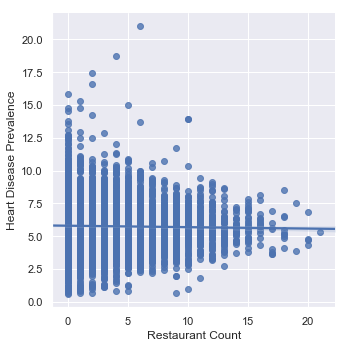

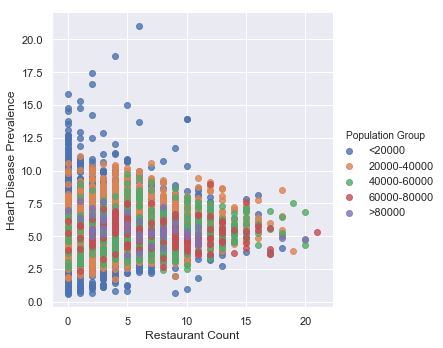

In [28]:
sns.lmplot("Restaurant Count","Heart Disease Prevalence",data=heart_prev,fit_reg=True)
plt.show()

sns.lmplot("Restaurant Count","Heart Disease Prevalence",data=heart_prev, hue="Population Group",fit_reg=False)
plt.show()

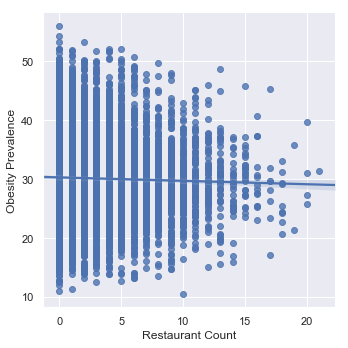

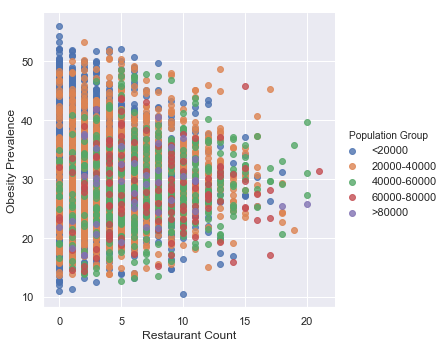

In [29]:
sns.lmplot("Restaurant Count","Obesity Prevalence",data=heart_prev,fit_reg=True)
plt.show()

sns.lmplot("Restaurant Count","Obesity Prevalence",data=heart_prev, hue="Population Group",fit_reg=False)
plt.show()

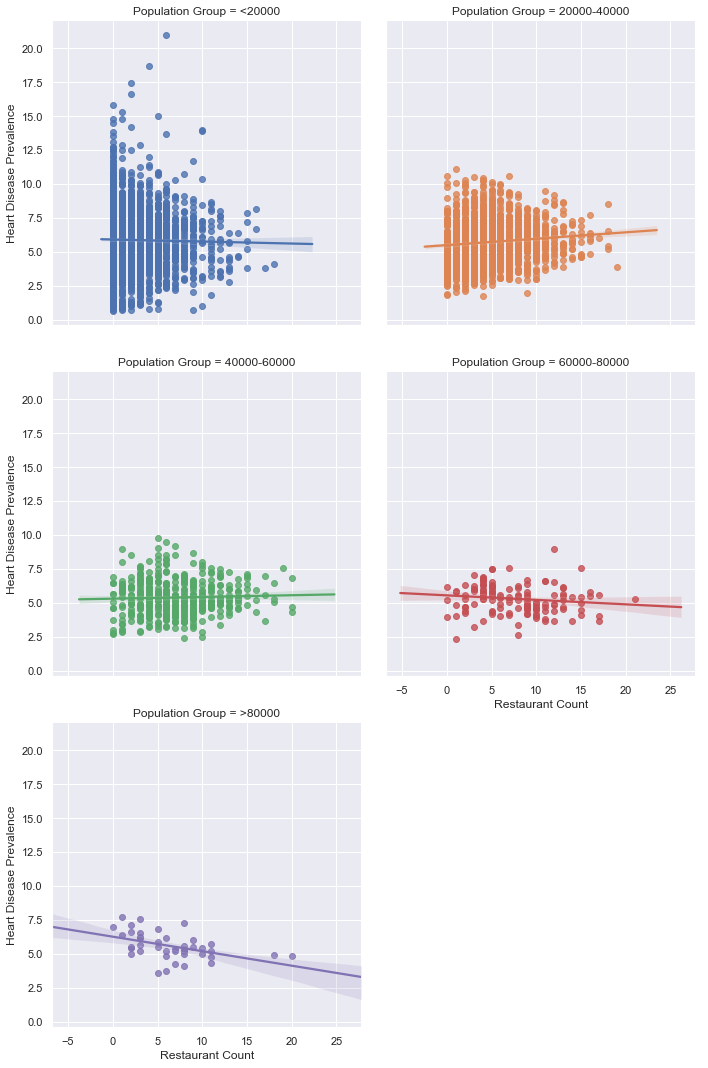

In [30]:
sns.lmplot("Restaurant Count","Heart Disease Prevalence",data=heart_prev,fit_reg=True, 
           col="Population Group", hue="Population Group", col_wrap=2)
plt.show()

In [31]:
bprev = heart_prev.loc[heart_prev["Population Group"] == "20000-40000"]
br = stats.pearsonr(bprev["Restaurant Count"],bprev["Heart Disease Prevalence"])
display("The pearson r and p-value for population 20000-40000: ", br)

cprev = heart_prev.loc[heart_prev["Population Group"] == "40000-60000"]
cr = stats.pearsonr(cprev["Restaurant Count"],cprev["Heart Disease Prevalence"])
display("The pearson r and p-value for population 40000-60000: ", cr)

'The pearson r and p-value for population 20000-40000: '

(0.10794990610051987, 1.585777533998619e-05)

'The pearson r and p-value for population 40000-60000: '

(0.04035644358733592, 0.3936029870135642)

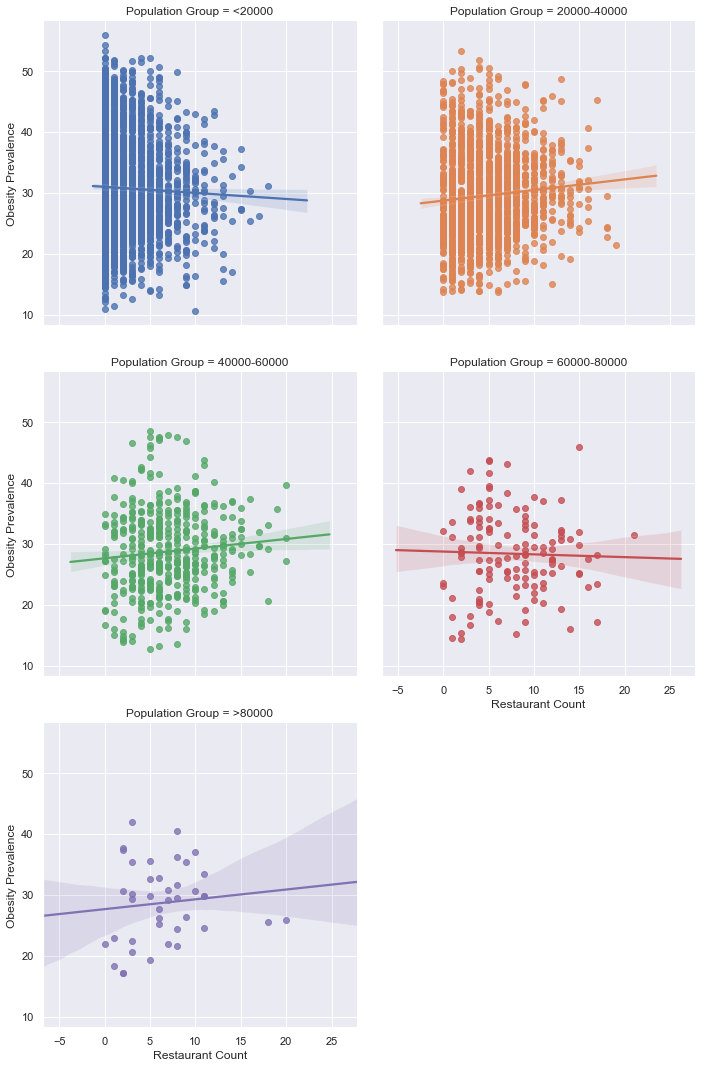

In [32]:
sns.lmplot("Restaurant Count","Obesity Prevalence",data=heart_prev,fit_reg=True, 
           col="Population Group", hue="Population Group", col_wrap=2)
plt.show()

In [33]:
obr = stats.pearsonr(bprev["Restaurant Count"],bprev["Obesity Prevalence"])
display("The pearson r and p-value for obesity in population 20000-40000: ", obr)

ocr = stats.pearsonr(cprev["Restaurant Count"],cprev["Obesity Prevalence"])
display("The pearson r and p-value for obesity in population 40000-60000: ", ocr)

'The pearson r and p-value for obesity in population 20000-40000: '

(0.08645234039843441, 0.000553988551520188)

'The pearson r and p-value for obesity in population 40000-60000: '

(0.09500757580100584, 0.04420770406063999)

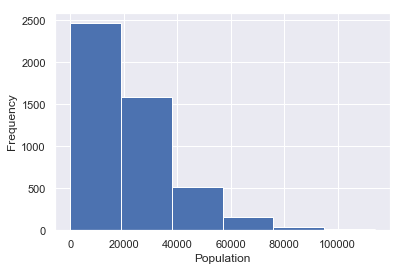

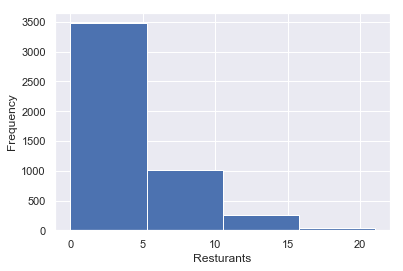

In [34]:
plt.hist(heart_prev["Population"], bins=6)
plt.xlabel("Population")
plt.ylabel("Frequency")
plt.show()

plt.hist(heart_prev["Restaurant Count"], bins=4)
plt.xlabel("Resturants")
plt.ylabel("Frequency")
plt.show()



In [35]:
hpopgroups = heart_prev.groupby("Population Group")["Heart Disease Prevalence"].mean().reset_index()
display(hpopgroups)

hrestgroups = heart_prev.groupby("Restaurant Group")["Heart Disease Prevalence"].mean().reset_index()
display(hrestgroups)

opopgroups = heart_prev.groupby("Population Group")["Obesity Prevalence"].mean().reset_index()
display(opopgroups)

orestgroups = heart_prev.groupby("Restaurant Group")["Obesity Prevalence"].mean().reset_index()
display(orestgroups)

,Population Group,Heart Disease Prevalence
0,20000-40000,5.718505
1,40000-60000,5.389025
2,60000-80000,5.292423
3,<20000,5.868479
4,>80000,5.572076


,Restaurant Group,Heart Disease Prevalence
0,0-7,5.780366
1,15-21,5.688635
2,8-14,5.616087


,Population Group,Obesity Prevalence
0,20000-40000,29.569329
1,40000-60000,28.738025
2,60000-80000,28.390865
3,<20000,30.760463
4,>80000,28.688329


,Restaurant Group,Obesity Prevalence
0,0-7,30.166437
1,15-21,29.844899
2,8-14,29.677131
